In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

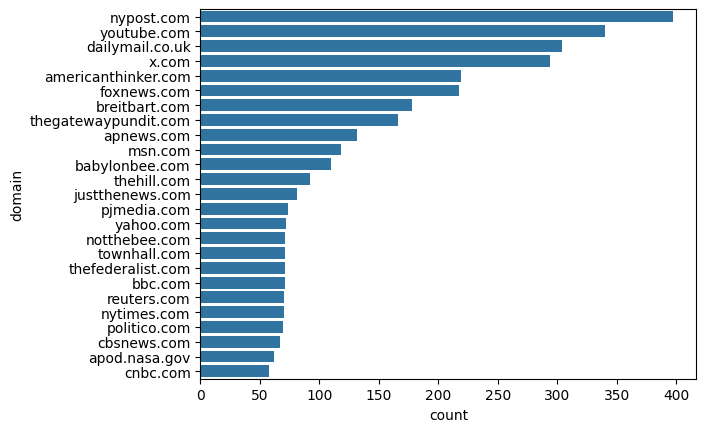

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

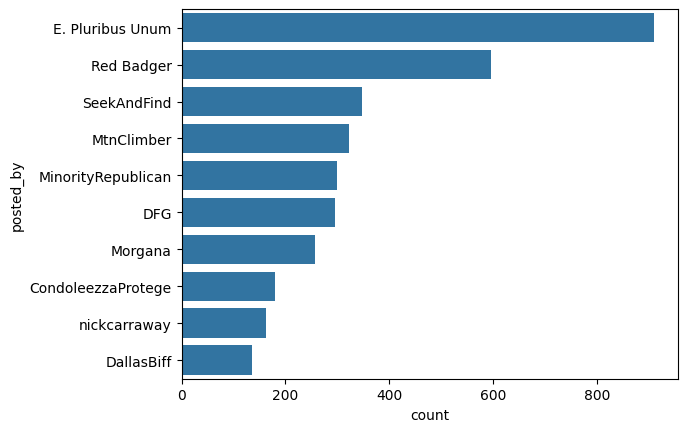

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_64877/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain                               \
                                         count unique                   top   
domain               posted_by                                                
americanthinker.com  E. Pluribus Unum       29      1   americanthinker.com   
                     MinorityRepublican      2      1   americanthinker.com   
                     MtnClimber            111      1   americanthinker.com   
                     SeekAndFind            46      1   americanthinker.com   
apnews.com           E. Pluribus Unum       35      1            apnews.com   
                     MinorityRepublican      4      1            apnews.com   
                     SeekAndFind             2      1            apnews.com   
                     CondoleezzaProtege      3      1            apnews.com   
                     DFG                     2      1            apnews.com   
                     DallasBiff              6      1            apnews.com   
                     Red Badger              5      1            apnews.com   
apod.nasa.gov        MtnClimber             62      1         apod.nasa.gov   
babylonbee.com       E. Pluribus Unum       59      1        babylonbee.com   
                     DFG                    23      1        babylonbee.com   
bbc.com              E. Pluribus Unum       29      1               bbc.com   
                     MinorityRepublican     11      1               bbc.com   
                     SeekAndFind             2      1               bbc.com   
                     CondoleezzaProtege      1      1               bbc.com   
                     Red Badger              1      1               bbc.com   
                     nickcarraway            2      1               bbc.com   
breitbart.com        MinorityRepublican      6      1         breitbart.com   
                     MtnClimber              1      1         breitbart.com   
                     CondoleezzaProtege      1      1         breitbart.com   
                     DFG                    13      1         breitbart.com   
                     DallasBiff              1      1         breitbart.com   
                     Red Badger             29      1         breitbart.com   
                     nickcarraway            1      1         breitbart.com   
                     Morgana                14      1         breitbart.com   
cbsnews.com          E. Pluribus Unum        3      1           cbsnews.com   
                     MinorityRepublican     12      1           cbsnews.com   
                     MtnClimber              1      1           cbsnews.com   
                     SeekAndFind             1      1           cbsnews.com   
                     CondoleezzaProtege      2      1           cbsnews.com   
                     DFG                     1      1           cbsnews.com   
                     DallasBiff              4      1           cbsnews.com   
                     Red Badger              5      1           cbsnews.com   
                     nickcarraway            3      1           cbsnews.com   
cnbc.com             E. Pluribus Unum        3      1              cnbc.com   
                     MinorityRepublican      2      1              cnbc.com   
                     SeekAndFind             9      1              cnbc.com   
                     CondoleezzaProtege      1      1              cnbc.com   
                     DFG                     3      1              cnbc.com   
                     Red Badger             11      1              cnbc.com   
dailymail.co.uk      E. Pluribus Unum       32      1       dailymail.co.uk   
                     MinorityRepublican     34      1       dailymail.co.uk   
                     CondoleezzaProtege      2      1       dailymail.co.uk   
                     DFG                    51      1       dailymail.co.uk   
                     DallasBiff              5      1       dailymail.co.uk   
           

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_64877/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
Chris Robinson: My Dad [our Jim Robinson] Passed Away Peacefully Monday Night (October 27th) In Our Home.,2025-11-02 21:15:28,303.0
"Hunter Biden Snaps, Calls Beloved Reporter A ‘Whore’ In Unhinged Interview",2025-11-15 21:01:26,233.0
Trump just yanked his support from Marjorie Taylor Greene and he’s gearing up to back a primary challenge in Georgia,2025-11-15 07:28:26,228.0
"Marjorie Taylor Greene announces that she will RESIGN from Congress on January 5th, 2026.",2025-11-22 04:33:21,206.0
Why Don’t People Return Their Shopping Carts? A (Somewhat) Scientific Investigation,2025-11-28 18:39:45,175.0
SHOCKING UFO findings revealed: ‘WE HAVE PROOF’ (video plus summary of Special Report with Bret Baier interview with David Grusch last night),2025-11-22 16:59:07,169.0
Post on X: MAGA is losing me,2025-11-11 18:53:59,166.0
Trump Tells Laura Ingraham the U.S. Lacks ‘Talented People’ in Discussion on H1-B Visas,2025-11-12 05:38:42,158.0
